In [1]:
pip install --upgrade opencv-python


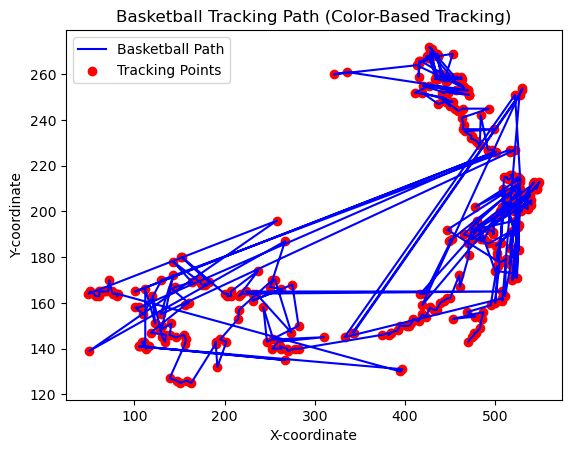

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def track_and_plot_path(video_path):
    cap = cv2.VideoCapture(video_path)

    # Define the color range for the basketball (you may need to adjust these values)
    lower_color = np.array([20, 100, 100], dtype=np.uint8)
    upper_color = np.array([30, 255, 255], dtype=np.uint8)

    # Lists to store the path coordinates
    path_x = []
    path_y = []

    while True:
        ret, frame = cap.read()
        if not ret:
            break

        # Convert the frame to the HSV color space
        hsv_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

        # Create a mask to extract the basketball based on color
        mask = cv2.inRange(hsv_frame, lower_color, upper_color)

        # Find contours in the mask
        contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        if contours:
            # Find the largest contour (assumed to be the basketball)
            largest_contour = max(contours, key=cv2.contourArea)
            
            # Calculate the centroid
            M = cv2.moments(largest_contour)
            if M["m00"] != 0:
                centroid_x = int(M["m10"] / M["m00"])
                centroid_y = int(M["m01"] / M["m00"])

                # Update the path coordinates
                path_x.append(centroid_x)
                path_y.append(centroid_y)

                # Draw the result on the image
                img2 = cv2.drawContours(frame.copy(), [largest_contour], -1, (0, 255, 0), 2)
                img2 = cv2.circle(img2, (centroid_x, centroid_y), 5, (255, 0, 0), -1)

                # Display the resulting frame
                cv2.imshow('Basketball Tracking', img2)

        # Break the loop if 'Esc' is pressed
        if cv2.waitKey(30) & 0xFF == 27:
            break

    cap.release()
    cv2.destroyAllWindows()

    # Plot the path
    plt.figure()
    plt.plot(path_x, path_y, label='Basketball Path', color='blue')
    plt.scatter(path_x, path_y, color='red', marker='o', label='Tracking Points')
    plt.title('Basketball Tracking Path (Color-Based Tracking)')
    plt.xlabel('X-coordinate')
    plt.ylabel('Y-coordinate')
    plt.legend()
    plt.show()

if __name__ == "__main__":
    video_path = "F:/abcdef/1105233243-preview.mp4"
    track_and_plot_path(video_path)
